In [91]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import seaborn as sns
%matplotlib inline

In [92]:
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('Iris dataset.csv', names=iris_columns)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [93]:
#PCA-Principal Component Analysis

In [102]:
# Extract the continuous attributes to a matrix X
X = iris.iloc[1:, :4].values
print(X.shape)
print(X)

(150, 4)
[['5.1' '3.5' '1.4' '0.2']
 ['4.9' '3.0' '1.4' '0.2']
 ['4.7' '3.2' '1.3' '0.2']
 ['4.6' '3.1' '1.5' '0.2']
 ['5.0' '3.6' '1.4' '0.2']
 ['5.4' '3.9' '1.7' '0.4']
 ['4.6' '3.4' '1.4' '0.3']
 ['5.0' '3.4' '1.5' '0.2']
 ['4.4' '2.9' '1.4' '0.2']
 ['4.9' '3.1' '1.5' '0.1']
 ['5.4' '3.7' '1.5' '0.2']
 ['4.8' '3.4' '1.6' '0.2']
 ['4.8' '3.0' '1.4' '0.1']
 ['4.3' '3.0' '1.1' '0.1']
 ['5.8' '4.0' '1.2' '0.2']
 ['5.7' '4.4' '1.5' '0.4']
 ['5.4' '3.9' '1.3' '0.4']
 ['5.1' '3.5' '1.4' '0.3']
 ['5.7' '3.8' '1.7' '0.3']
 ['5.1' '3.8' '1.5' '0.3']
 ['5.4' '3.4' '1.7' '0.2']
 ['5.1' '3.7' '1.5' '0.4']
 ['4.6' '3.6' '1.0' '0.2']
 ['5.1' '3.3' '1.7' '0.5']
 ['4.8' '3.4' '1.9' '0.2']
 ['5.0' '3.0' '1.6' '0.2']
 ['5.0' '3.4' '1.6' '0.4']
 ['5.2' '3.5' '1.5' '0.2']
 ['5.2' '3.4' '1.4' '0.2']
 ['4.7' '3.2' '1.6' '0.2']
 ['4.8' '3.1' '1.6' '0.2']
 ['5.4' '3.4' '1.5' '0.4']
 ['5.2' '4.1' '1.5' '0.1']
 ['5.5' '4.2' '1.4' '0.2']
 ['4.9' '3.1' '1.5' '0.1']
 ['5.0' '3.2' '1.2' '0.2']
 ['5.5' '3.5' '1.3'

In [103]:
# Extract the class attribute as y
y = iris.iloc[1:,4].astype('category').values
print(y.shape)
print(y)

(150,)
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', ..., 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']
Length: 150
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [96]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_fit = pca.transform(X)

In [97]:
print('Cumulative Variance explained by 1 principal components: %.2f%%' % ( sum(pca.explained_variance_ratio_) * 100))

Cumulative Variance explained by 1 principal components: 97.76%


In [98]:
# Put principal components into a data frame so we can plot it.
dfpc = pd.DataFrame(X_fit, columns=['pc1', 'pc2'])
dfpc['class'] = y

<Figure size 1000x1000 with 0 Axes>

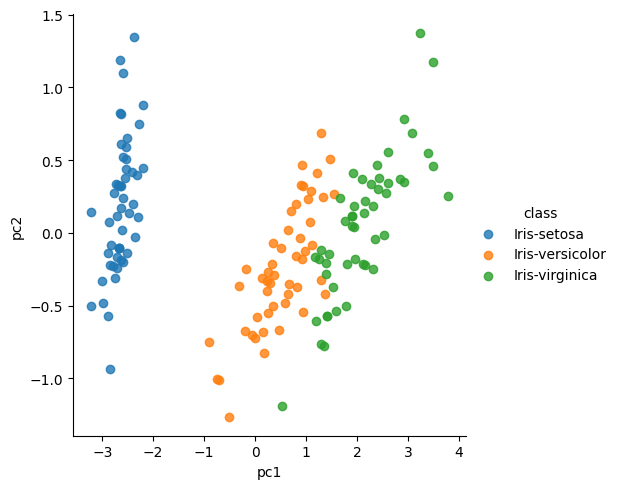

In [99]:
plt.figure(1, figsize=(10,10), dpi=100)
plt.clf()
sns.lmplot(data=dfpc, x="pc1", y="pc2", fit_reg=False, hue='class')
plt.show()

In [ ]:
#KMeans Clustering

In [104]:
def k_means_clustering(dataset, num_clusters):
    # Remove the 'Species' column and store it for future comparison
    species = dataset['Species']
    data = dataset.iloc[:, 1:4].astype(float)  # Convert data to float type
    
    # Remove the last row
    data = data[:-1]
    species = species[:-1]
    
    # Convert the dataset to a NumPy array
    X = data.values
    
    # Randomly initialize the centroids
    np.random.seed(42)
    centroids = X[np.random.choice(range(X.shape[0]), size=num_clusters, replace=False)]
    
    # Initialize the cluster assignments and old centroids
    clusters = np.zeros(X.shape[0])
    old_centroids = np.zeros(centroids.shape)
    
    # Iterate until convergence
    while not np.allclose(centroids, old_centroids):
        # Assign points to the nearest centroid
        for i, point in enumerate(X):
            distances = np.linalg.norm(point - centroids, axis=1)
            clusters[i] = np.argmin(distances)
        
        # Update the centroids
        for j in range(num_clusters):
            centroids[j] = np.mean(X[clusters == j], axis=0)
        
        # Store the current centroids for convergence check
        old_centroids = np.copy(centroids)
        
        
    # Plot the clusters
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    
    
    # Plot the actual species
    plt.scatter(X[:, 0], X[:, 1], c=species.astype('category').cat.codes, cmap='viridis')
    plt.title('Actual Species')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


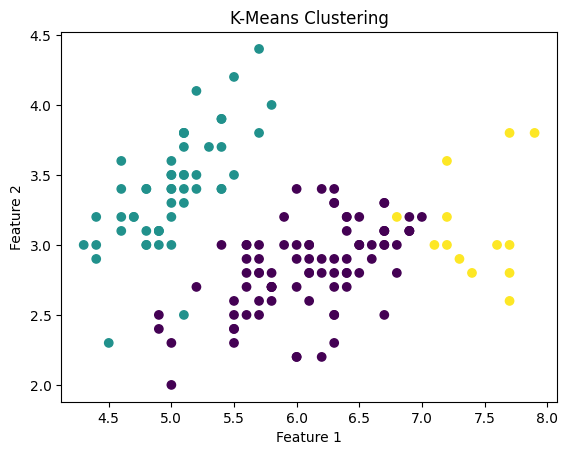

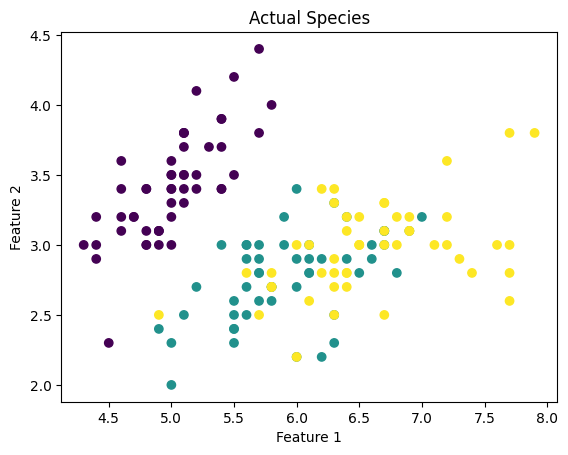

In [105]:
# Load the dataset
dataset = pd.read_csv('Iris dataset.csv')

# Apply K-Means Clustering
k_means_clustering(dataset, num_clusters=3)